<a href="https://colab.research.google.com/github/analyst-ahsan/Python-Projects/blob/main/SuperMarket_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sales Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hour_order = range(0, 24)

In [ ]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [ ]:
### Column Names ###

df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Data Processing

In [ ]:
### Creating New DATE/TIME Columns ###


df['timestamp'] = pd.to_datetime(df['Date']+ ' ' + df['Time'])
df['date_conv'] = df['timestamp'].dt.date
df['time_conv'] = df['timestamp'].dt.time
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month_name()
df['hour'] = df['timestamp'].dt.hour

In [ ]:
### Coverting to Catgeorical ###


df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['Branch'] = pd.Categorical(df['Branch'], categories=['A', 'B', 'C'], ordered=True)
df['Gender'] = pd.Categorical(df['Gender'], categories=['Male', 'Female'], ordered=True)

### Data Visuals


In [ ]:
### Sales by Branch ###


branch_grouped = df.groupby('Branch')['Total'].sum()
branch_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Branch Sales')
plt.ylabel('')
plt.show()

In [ ]:
### City by Branch ###


city_grouped = df.groupby('City')['Total'].sum()
city_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('City Sales')
plt.ylabel('')
plt.show()

In [ ]:
### Sales by Product ###


product_grouped = df.groupby('Product line')['Total'].sum()
product_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Sales')
plt.ylabel('')
plt.show()

In [ ]:
### Sales by Customer ###


customer_grouped = df.groupby('Customer type')['Total'].sum()
customer_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Sales')
plt.ylabel('')
plt.show()

In [ ]:
### Sales by Day of week ###


sales_by_day = df.groupby('day_of_week')['Total'].sum()
sales_by_day = sales_by_day.reindex(day_order)
sales_by_day.plot(kind='line', marker = 'o')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Sales by Day of Week')
plt.grid(True)
plt.show

In [ ]:
### Sales by Hour ###


sales_by_hour = df.groupby(['hour', 'Branch'])['Total'].sum()
sales_by_hour = sales_by_hour.unstack()
sales_by_hour.plot(kind='line', marker = 'o')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Sales by Hour')
plt.grid(True)
plt.show

In [ ]:
### Sales by Branch and Hour ###


g = sns.FacetGrid(df, col="Branch", col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x="hour", y="Total", marker="o", ci=None, hue="Gender")
g.set_titles("Branch {col_name}")
plt.legend(title="Gender")
plt.show()

In [ ]:
### Sales by Gender and Hour ###


sns.lineplot(data = df , x = 'hour', y = 'Total', hue = 'Gender', ci = None, marker = 'o')
plt.title('Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [ ]:
### Sales by Branch and Day of Week ###


g = sns.FacetGrid(df, col="Branch", col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x="day_of_week", y="Total", marker="o", ci=None, hue="Gender")
g.set_titles(col_template="Branch {col_name}")
g.set_axis_labels("Day of Week", "Total Sales")
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.grid(True)

# Rotate x-axis labels
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

In [ ]:
### Sales by Gender and Day of Week ###


sns.lineplot(data = df , x = 'day_of_week', y = 'Total', hue = 'Gender', ci = None, marker = 'o')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [ ]:
### Rating by Product ###


g=sns.catplot(data = df , x='Product line', y ='Rating', kind ='box')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

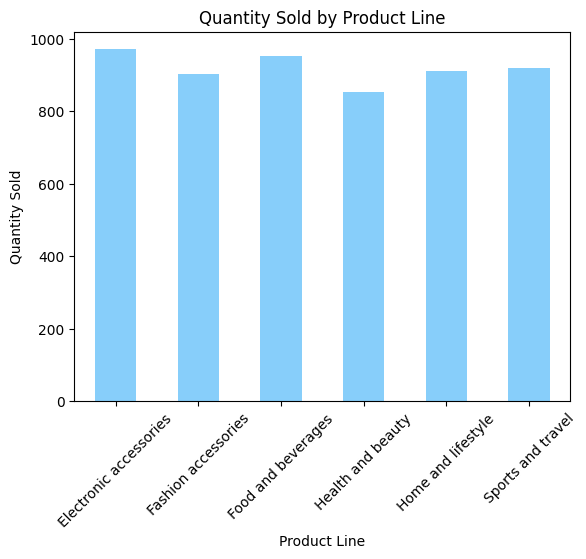

In [ ]:
### Quantity Sold by Product Line ###


quantity_by_product_line = df.groupby('Product line')['Quantity'].sum()
quantity_by_product_line.plot(kind='bar', title='Quantity Sold by Product Line', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

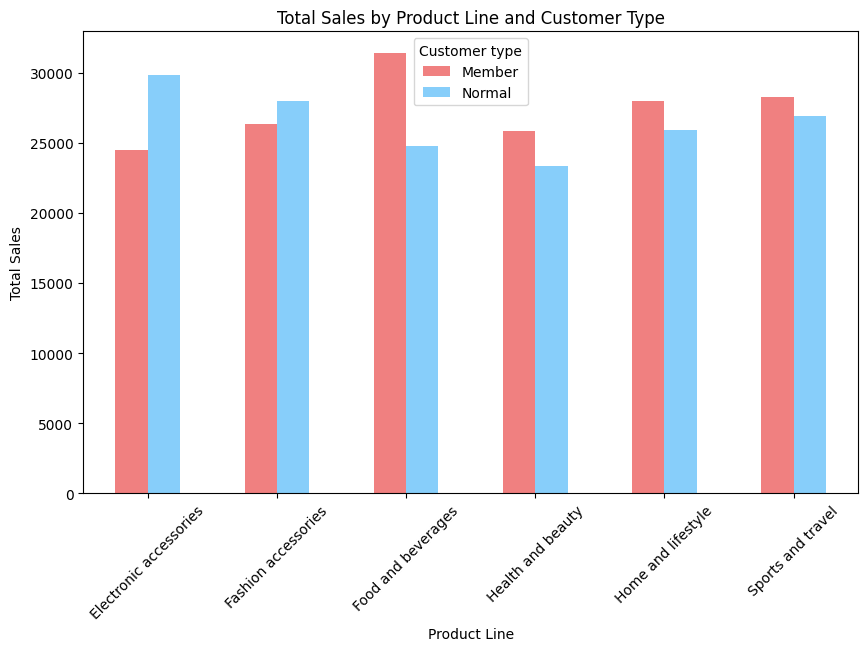

In [ ]:
### Pivot table for sales by product line and customer type ###


sales_product_customer = df.pivot_table(values='Total', index='Product line', columns='Customer type', aggfunc='sum')
sales_product_customer.plot(kind='bar', title='Total Sales by Product Line and Customer Type', figsize=(10, 6), color=['lightcoral', 'lightskyblue'])
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

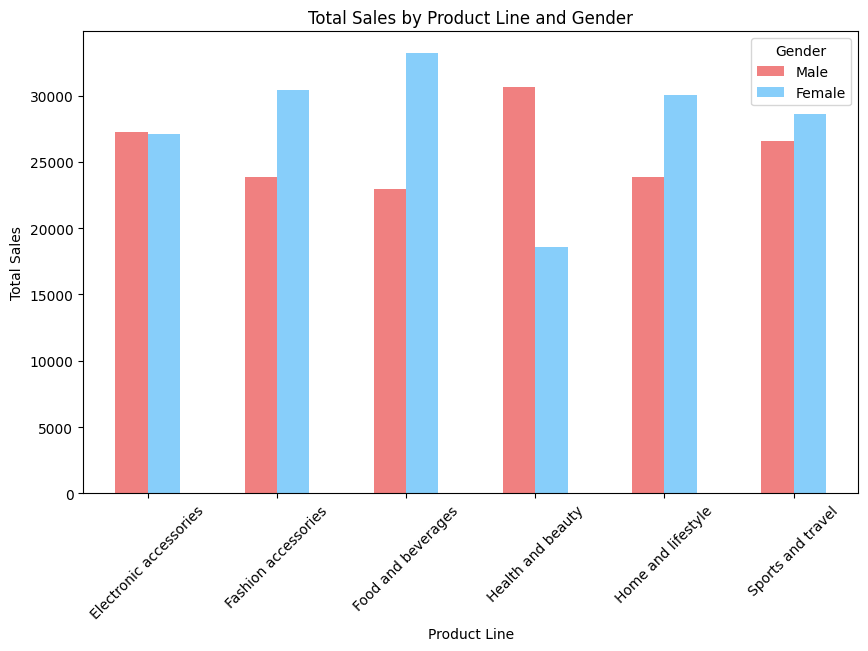

In [ ]:
### Pivot table for sales by product line and gender ###


sales_product_gender = df.pivot_table(values='Total', index='Product line', columns='Gender', aggfunc='sum')
sales_product_gender.plot(kind='bar', title='Total Sales by Product Line and Gender', figsize=(10, 6), color=['lightcoral', 'lightskyblue'])
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

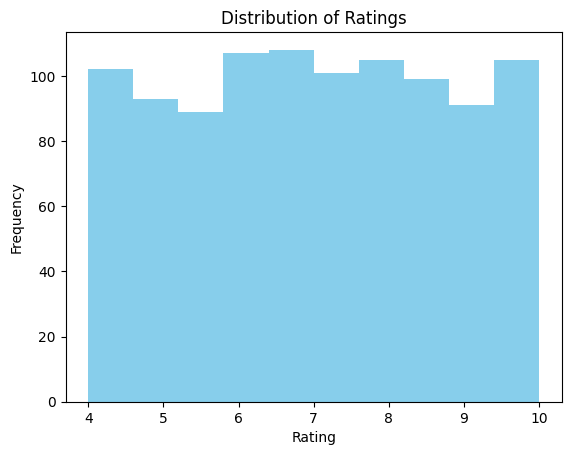

In [ ]:
### Distribution of Ratings ###


df['Rating'].plot(kind='hist', bins=10, title='Distribution of Ratings', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

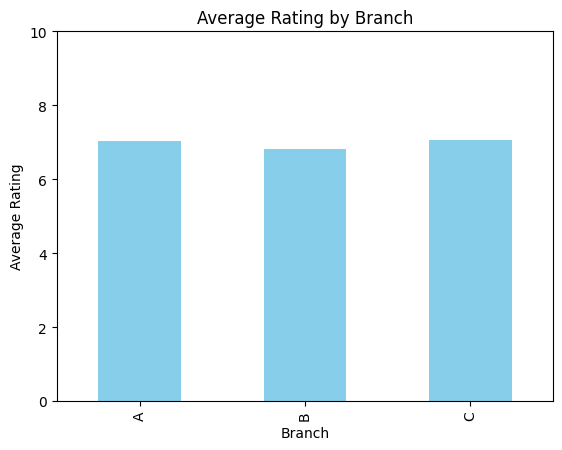

In [ ]:
### Average Rating by Branch ###


avg_rating_by_branch = df.groupby('Branch')['Rating'].mean()
avg_rating_by_branch.plot(kind='bar', title='Average Rating by Branch', color='skyblue')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Assuming ratings are on a scale of 1 to 10
plt.show()

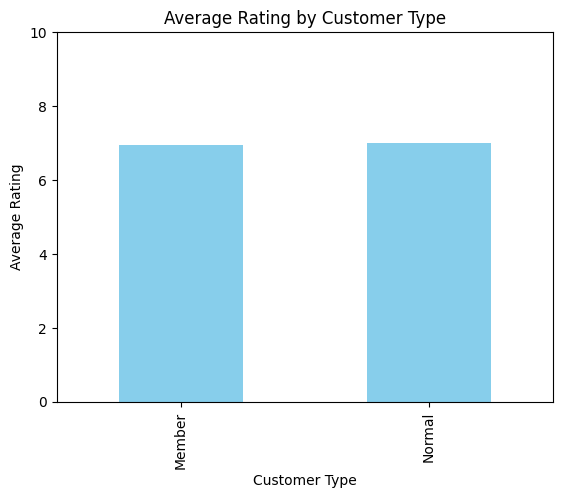

In [ ]:
### Average Rating by Customer Type ###


avg_rating_by_customer_type = df.groupby('Customer type')['Rating'].mean()
avg_rating_by_customer_type.plot(kind='bar', title='Average Rating by Customer Type', color='skyblue')
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Assuming ratings are on a scale of 1 to 10
plt.show()

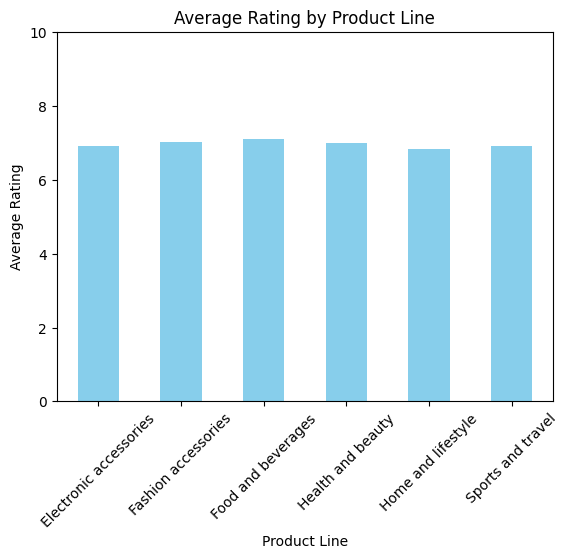

In [ ]:
### Average Rating by Product Line ###


avg_rating_by_product_line = df.groupby('Product line')['Rating'].mean()
avg_rating_by_product_line.plot(kind='bar', title='Average Rating by Product Line', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Assuming ratings are on a scale of 1 to 10
plt.xticks(rotation=45)
plt.show()